In [1]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:28<00:00, 30.6MB/s]
100% 812M/812M [00:28<00:00, 29.7MB/s]


In [9]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [10]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('Number of images: ',file_count)

Number of images:  25000


In [13]:
file_names=os.listdir('/content/train/')
print(file_names)

['cat.6399.jpg', 'cat.4350.jpg', 'cat.11215.jpg', 'dog.9249.jpg', 'cat.8229.jpg', 'dog.6871.jpg', 'dog.8639.jpg', 'dog.830.jpg', 'dog.9583.jpg', 'cat.8664.jpg', 'cat.7363.jpg', 'cat.5890.jpg', 'cat.526.jpg', 'cat.11517.jpg', 'cat.5693.jpg', 'dog.7970.jpg', 'dog.3395.jpg', 'dog.11235.jpg', 'dog.3643.jpg', 'cat.6798.jpg', 'dog.7019.jpg', 'dog.6208.jpg', 'cat.1524.jpg', 'cat.8729.jpg', 'cat.1599.jpg', 'cat.5437.jpg', 'dog.8316.jpg', 'dog.1834.jpg', 'cat.6576.jpg', 'dog.8845.jpg', 'cat.3558.jpg', 'cat.5475.jpg', 'dog.10931.jpg', 'cat.9506.jpg', 'cat.1545.jpg', 'cat.9953.jpg', 'cat.6553.jpg', 'dog.9551.jpg', 'dog.10846.jpg', 'dog.4087.jpg', 'dog.2916.jpg', 'dog.7574.jpg', 'cat.131.jpg', 'cat.398.jpg', 'dog.7767.jpg', 'cat.6041.jpg', 'dog.9581.jpg', 'cat.1503.jpg', 'dog.11502.jpg', 'cat.11824.jpg', 'cat.8821.jpg', 'cat.8438.jpg', 'dog.4609.jpg', 'dog.1512.jpg', 'dog.2252.jpg', 'cat.4660.jpg', 'cat.5365.jpg', 'dog.7835.jpg', 'dog.10811.jpg', 'cat.2756.jpg', 'dog.11087.jpg', 'cat.5443.jpg', 'd

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

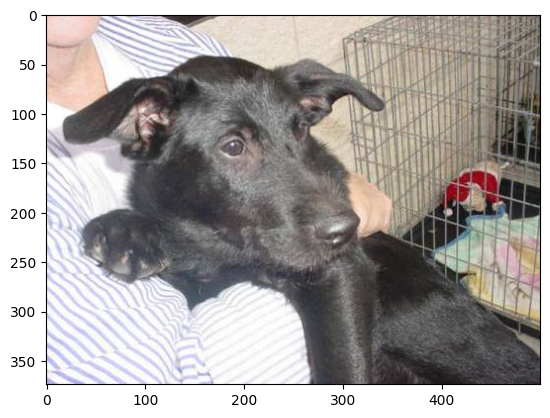

In [17]:
img=mpimg.imread('/content/train/dog.9249.jpg')
imgplt=plt.imshow(img)
plt.show()

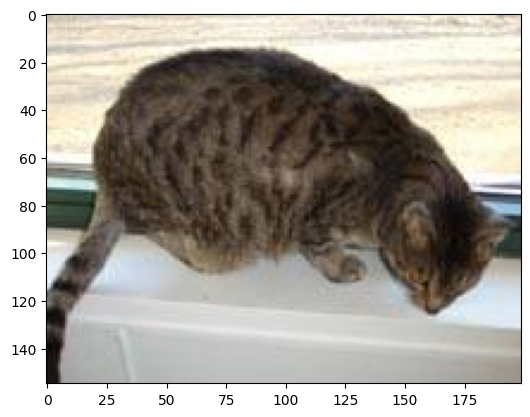

In [16]:
img=mpimg.imread('/content/train/cat.11215.jpg')
imgplt=plt.imshow(img)
plt.show()

In [18]:
file_names=os.listdir('/content/train/')
dc=0
cc=0
for file_name in file_names:
  name=file_name[:3]
  if name=='dog':
    dc+=1
  else:
    cc+=1
print('Number of dog images: ',dc)
print('Number of cat images: ',cc)


Number of dog images:  12500
Number of cat images:  12500


In [24]:
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [25]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

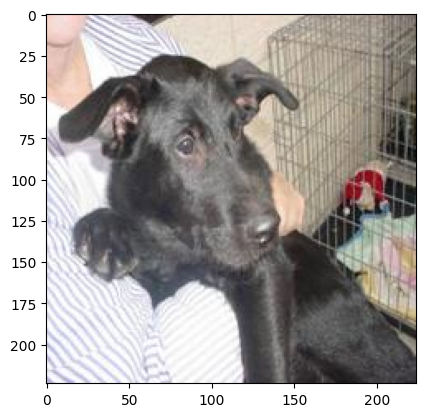

In [26]:
img=mpimg.imread('/content/image resized/dog.9249.jpg')
imgplt=plt.imshow(img)
plt.show()

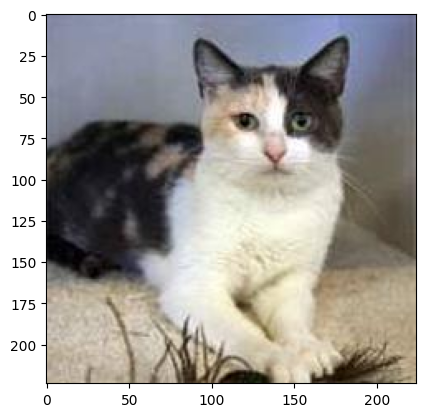

In [27]:
img=mpimg.imread('/content/image resized/cat.4350.jpg')
imgplt=plt.imshow(img)
plt.show()

In [28]:
filenames=os.listdir('/content/image resized')
lables=[]

for filename in filenames:
  if filename[:3]=='dog':
    lables.append(1)
  else:
    lables.append(0)


In [29]:
print(lables[:5])
print(filenames[:5])

[0, 0, 0, 1, 0]
['cat.6399.jpg', 'cat.4350.jpg', 'cat.11215.jpg', 'dog.9249.jpg', 'cat.8229.jpg']


In [30]:
values,counts=np.unique(lables,return_counts=True)
print(values)
print(counts)

[0 1]
[ 985 1015]


In [31]:
import cv2
import glob

In [32]:
image_directory='/content/image resized/'
image_extension=['png','jpg']
files=[]

[files.extend(glob.glob(image_directory+'*.'+e))for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])


In [33]:
print(dog_cat_images)

[[[[  7  13  36]
   [  7  13  36]
   [  5  12  39]
   ...
   [  2  12  36]
   [  0  11  33]
   [  0  11  33]]

  [[  8  14  37]
   [  8  14  37]
   [  6  13  40]
   ...
   [  1  11  35]
   [  0  10  32]
   [  0   9  31]]

  [[  7  15  38]
   [  7  15  38]
   [  7  14  41]
   ...
   [  0   9  33]
   [  0   8  30]
   [  0   7  27]]

  ...

  [[ 52  60  77]
   [ 50  58  75]
   [ 50  58  75]
   ...
   [ 66  77 107]
   [ 66  77 107]
   [ 65  76 106]]

  [[ 54  62  79]
   [ 51  59  76]
   [ 52  60  77]
   ...
   [ 69  80 110]
   [ 66  77 107]
   [ 63  74 104]]

  [[ 58  66  83]
   [ 54  62  79]
   [ 55  63  80]
   ...
   [ 71  82 112]
   [ 65  76 106]
   [ 60  71 101]]]


 [[[171 144 140]
   [170 143 139]
   [168 141 137]
   ...
   [152 119 116]
   [155 124 121]
   [161 130 127]]

  [[166 139 135]
   [165 138 134]
   [163 136 132]
   ...
   [147 114 111]
   [150 119 116]
   [156 125 122]]

  [[164 137 133]
   [163 136 132]
   [161 134 130]
   ...
   [144 111 108]
   [148 117 114]
   [153 122

In [34]:
print(type(dog_cat_images))

<class 'numpy.ndarray'>


In [35]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [36]:
X=dog_cat_images
Y=np.asarray(lables)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600,), (400,))

In [39]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [40]:
print(X_train_scaled)

[[[[0.91372549 0.89803922 0.89411765]
   [0.90588235 0.89019608 0.88627451]
   [0.90588235 0.88627451 0.88235294]
   ...
   [0.46666667 0.51372549 0.52941176]
   [0.59215686 0.63921569 0.65490196]
   [0.4627451  0.50980392 0.5254902 ]]

  [[0.91372549 0.89803922 0.89411765]
   [0.90588235 0.89019608 0.88627451]
   [0.90588235 0.88627451 0.88235294]
   ...
   [0.47058824 0.51764706 0.53333333]
   [0.54901961 0.59607843 0.61176471]
   [0.47843137 0.5254902  0.54117647]]

  [[0.91372549 0.89803922 0.89411765]
   [0.90588235 0.89019608 0.88627451]
   [0.90588235 0.88627451 0.88235294]
   ...
   [0.48627451 0.53333333 0.54901961]
   [0.49411765 0.54117647 0.55686275]
   [0.49411765 0.54117647 0.55686275]]

  ...

  [[0.41176471 0.45490196 0.50980392]
   [0.41960784 0.4627451  0.51764706]
   [0.44313725 0.48627451 0.54117647]
   ...
   [0.56862745 0.61568627 0.70980392]
   [0.51372549 0.56470588 0.66666667]
   [0.56078431 0.61176471 0.71372549]]

  [[0.42352941 0.46666667 0.52156863]
   [0.4

In [41]:
X_test_scaled

array([[[[0.47058824, 0.13333333, 0.76078431],
         [0.47843137, 0.16470588, 0.74117647],
         [0.44705882, 0.18431373, 0.65882353],
         ...,
         [0.43137255, 0.82745098, 0.46666667],
         [0.47058824, 0.84705882, 0.49019608],
         [0.51372549, 0.88627451, 0.52941176]],

        [[0.43921569, 0.15686275, 0.69411765],
         [0.4627451 , 0.2       , 0.70588235],
         [0.44313725, 0.20784314, 0.65490196],
         ...,
         [0.4       , 0.80392157, 0.44705882],
         [0.4627451 , 0.84705882, 0.49411765],
         [0.49803922, 0.8745098 , 0.52156863]],

        [[0.41568627, 0.24313725, 0.61568627],
         [0.43921569, 0.26666667, 0.63921569],
         [0.43529412, 0.25490196, 0.64313725],
         ...,
         [0.42745098, 0.83529412, 0.49019608],
         [0.41568627, 0.81568627, 0.47058824],
         [0.39607843, 0.78823529, 0.44313725]],

        ...,

        [[0.1254902 , 0.38039216, 0.10980392],
         [0.08627451, 0.34509804, 0.06666667]

In [42]:
import tensorflow as tf
import tensorflow_hub as hub

In [43]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [44]:
num_of_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [46]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.2120 - acc: 0.9106
Epoch 2/5
50/50 [==============================] - 71s 1s/step - loss: 0.0686 - acc: 0.9787
Epoch 3/5
50/50 [==============================] - 75s 1s/step - loss: 0.0532 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 68s 1s/step - loss: 0.0413 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.0344 - acc: 0.9919


In [47]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss: ',score)
print('Test accuracy: ',acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0928 - acc: 0.9675
Test Loss:  0.09279599040746689
Test accuracy:  0.9674999713897705


In [50]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

In [ ]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')